# Machine Learning 

### Raffaele Perini 

In this notebook we are going to explore some functionalities regaring  **Scikit-learn** (https://scikit-learn.org/)

Dataset http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

## Load the dataset

In [1]:
# Import dataset
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()

# Shape
print(digits.data.shape)

# Names of the targets(classes of the classifier)
print(digits.target_names)

(1797, 64)
[0 1 2 3 4 5 6 7 8 9]


## Visualization
In this part there are some example on how to visualize data

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


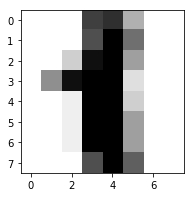

In [2]:
# library for displaying plots
import matplotlib.pyplot as plt
# display plots in the notebook
%matplotlib inline


# Example of data and its representation
print(digits.data[1])

#Display the digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

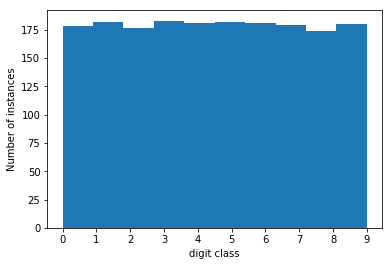

In [3]:
# Plot histogram
plt.hist(digits.target)
plt.ylabel('Number of instances')
plt.xlabel('digit class')
plt.xticks(range(len(digits.target_names)), digits.target_names);

Text(0,0.5,'Pixel color number')

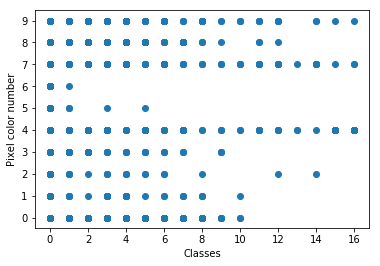

In [4]:
# Distribution of the 22nd pixel value for each digit class
plt.scatter(digits.data[:,22], digits.target)
plt.yticks(range(len(digits.target_names)), digits.target_names);
plt.xlabel('Classes')
plt.ylabel('Pixel color number')

#  Classification Algorithms

## k-Nearest Neighbors Model

We are going to train the model, make predictions with this model and evaluate these predictions.

### preprocessing of the algorithm

The first step after loading data is  to preprocess the data

In [5]:
# Import library for training set split
from sklearn.model_selection import train_test_split

x_digits, y_digits = digits.data, digits.target
# Test set will be the 25% taken randomly
x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits, test_size=0.25, random_state=33)

# Dimensions of train and testing
print(x_train.shape, x_test.shape)

((1347, 64), (450, 64))


In [6]:
# Standardize the features
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Train classifier

The steps are:
* Create classifier object
* Call fit to train the classifier
* Call predict to obtain predictions

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Create kNN model with k = 15
model = KNeighborsClassifier(n_neighbors=15)

# Train the model using the training sets
model.fit(x_train, y_train)

# Prediction
print("Prediction: ", model.predict(x_train))
print("Expected: ", y_train)

# Print the Predicted probabilities for each class
# print("Predicted probabilities", model.predict_proba(x_train[:10]))

('Prediction: ', array([4, 7, 4, ..., 1, 5, 5]))
('Expected: ', array([4, 7, 4, ..., 1, 5, 5]))


In [8]:
# Evaluate Accuracy in training
from sklearn import metrics
y_train_pred = model.predict(x_train)
print("Accuracy in training: ", metrics.accuracy_score(y_train, y_train_pred))

# Evaluate Accuracy in testing
y_test_pred = model.predict(x_test)
print("Accuracy in testing: ", metrics.accuracy_score(y_test, y_test_pred))

('Accuracy in training: ', 0.9732739420935412)
('Accuracy in testing: ', 0.9711111111111111)


### Evaluating the algorithm

Precision, recall and f-score

* **Precision**: This computes the proportion of instances predicted as positives that were correctly evaluated (it measures how right our classifier is when it says that an instance is positive).
* **Recall**: This counts the proportion of positive instances that were correctly evaluated (measuring how right our classifier is when faced with a positive instance).
* **F1-score**: This is the harmonic mean of precision and recall, and tries to combine both in a single number.

In [9]:
target_names = list(digits.target_names)
print(metrics.classification_report(y_test, y_test_pred, target_names))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        35
          1       0.96      0.98      0.97        54
          2       1.00      1.00      1.00        44
          3       0.98      0.96      0.97        46
          4       1.00      0.91      0.96        35
          5       0.98      0.96      0.97        48
          6       0.98      1.00      0.99        51
          7       0.97      1.00      0.99        35
          8       0.90      0.95      0.92        58
          9       0.98      0.95      0.97        44

avg / total       0.97      0.97      0.97       450



### Confusion Matrix

Used to check the actual error in the prediction

In [10]:
print(metrics.confusion_matrix(y_test, y_test_pred, ))

[[35  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  2  0]
 [ 0  0  0  0 32  0  0  1  2  0]
 [ 0  0  0  0  0 46  1  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  2  0  1  0  0  0  0 55  0]
 [ 0  0  0  0  0  1  0  0  1 42]]


#### K-Fold validation

Used to avoid bias in the training and testing dataset partition.


In [11]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create a composite estimator made by a pipeline of preprocessing and the KNN model
model = Pipeline([
        ('scaler', StandardScaler()),
        ('kNN', KNeighborsClassifier())
])

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x_digits, y_digits, cv=cv)
print(scores)

[0.97777778 0.97222222 0.99444444 0.97777778 0.97222222 0.96111111
 0.97777778 0.97765363 0.98882682 0.98882682]


In [12]:
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

Mean score: 0.979 (+/- 0.003)


In the end we got and accuracy of 0.979

### Tuning the algorithm
We are going to tune the algorithm, and calculate which is the best value for the k parameter.

The result is very dependent of the input data, using a small k increases accuracy in the model but increase also overfitting, in the other hand using a big k increases the error.

Text(0,0.5,'Accuracy')

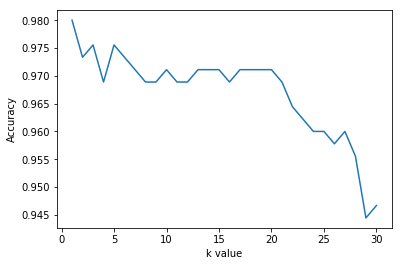

In [13]:
k_range = range(1, 31)
accuracy = []
for k in k_range:
    m = KNeighborsClassifier(k)
    m.fit(x_train, y_train)
    y_test_pred = m.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
plt.plot(k_range, accuracy)
plt.xlabel('k value')
plt.ylabel('Accuracy')

## Decision Tree learning Algorithm

The scikit-learn uses an optimised version of the CART (Classification and Regression Trees) algorithm.

### Train Algorithm

Same steps performed for kNN, but in this case we try to change the percentage at 15%, to increase a bit the accuracy of the model

In [14]:
# Import library for training set split
from sklearn.model_selection import train_test_split

x_digits, y_digits = digits.data, digits.target
# Test set will be the 19% taken randomly
x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits, test_size=0.19, random_state=33)

# Dimensions of train and testing
print(x_train.shape, x_test.shape)

((1455, 64), (342, 64))


In [15]:
# Standardize the features
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

from sklearn import tree

max_depth=3
random_state=1

# Create decision tree model
model = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

# Train the model using the training sets
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [17]:
print("Prediction: ", model.predict(x_train))
print("Expected: ", y_train)

# Print the probabilities of each class
# print("Predicted probabilities", model.predict_proba(x_train[:10]))

('Prediction: ', array([3, 3, 3, ..., 3, 3, 5]))
('Expected: ', array([3, 3, 4, ..., 1, 5, 5]))


In [18]:
from sklearn import metrics

#Evaluate Accuracy in training
y_train_pred = model.predict(x_train)
print("Accuracy in training: ", metrics.accuracy_score(y_train, y_train_pred))

# Now we evaluate error in testing
y_test_pred = model.predict(x_test)
print("Accuracy in testing: ", metrics.accuracy_score(y_test, y_test_pred))

('Accuracy in training: ', 0.49828178694158076)
('Accuracy in testing: ', 0.4473684210526316)


### Evaluating the algorithm

Same way as kNN
with confusion matrix

In [19]:
target_names = list(digits.target_names)
print(metrics.classification_report(y_test, y_test_pred, target_names))
print(metrics.confusion_matrix(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.93      0.96      0.95        28
          1       0.00      0.00      0.00        46
          2       0.00      0.00      0.00        36
          3       0.16      0.79      0.27        33
          4       0.00      0.00      0.00        22
          5       0.57      0.89      0.70        35
          6       0.79      0.97      0.87        39
          7       0.56      0.82      0.67        28
          8       0.00      0.00      0.00        42
          9       0.80      0.24      0.37        33

avg / total       0.36      0.45      0.36       342

[[27  0  0  0  0  1  0  0  0  0]
 [ 0  0  0 34  0  7  3  2  0  0]
 [ 1  0  0 27  0  6  1  1  0  0]
 [ 0  0  0 26  0  4  0  2  0  1]
 [ 0  0  0 10  0  1  5  6  0  0]
 [ 0  0  0  1  0 31  1  1  0  1]
 [ 0  0  0  0  0  1 38  0  0  0]
 [ 0  0  0  4  0  1  0 23  0  0]
 [ 0  0  0 38  0  1  0  3  0  0]
 [ 1  0  0 20  0  1  0  3  0  8]]


/opt/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### K fold cross validation


In [20]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create a composite estimator made by a pipeline of preprocessing and the KNN model
model = Pipeline([
        ('scaler', StandardScaler()),
        ('DecisionTree', DecisionTreeClassifier())
])

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x_digits, y_digits, cv=cv)
print(scores)



[0.83333333 0.83888889 0.86111111 0.88333333 0.91111111 0.85555556
 0.87777778 0.86592179 0.83798883 0.84916201]


In [21]:
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

Mean score: 0.861 (+/- 0.008)


### Tuning the algorithm

Let's try now to tuning the algorithm changing the max_depth parameter

Text(0,0.5,'Accuracy')

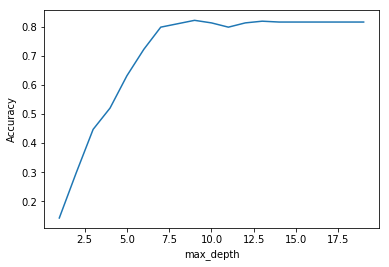

In [22]:
k_range = range(1, 20)

max_depth=3
random_state=1

# Create decision tree model
accuracy = []
for k in k_range:   
    m = tree.DecisionTreeClassifier(max_depth=k, random_state=random_state)
    m.fit(x_train, y_train)
    y_test_pred = m.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
plt.plot(k_range, accuracy)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

## Conclusion

In this notebook have been analysed different aspects regarding **Machine Learning** in **Python** using the *digits* dataset.

##### Loading and visualization

Loading the dataset has been pretty easy since it is interegrated in the Scikit-learn kit. This dataset includes the 8x8 image of a digit hand-written. Every image is mapped into an array of pixel in which each position represents a pixel and its value[0:16] represents the color of that pixel. 
Looking at the Histogram it is possible to notice that the dataset is balanced. Finally there is a (not very useful) scatter plot which displays the disribution of the 22th pixel value for each digit.

##### Classification

Two algorithms have been used in this case **kNN** and **Decision Tree**. 

The first step consists to apply these algorithms is to **preprocess** the data. This operation has been divided in **two** main steps, **split the dataset** into training and testing set and then the **standardization of datasets** (common requirement for many machine learning estimators implemented in the scikit) into features that more or less look like standard normally distributed data(Gaussian with zero mean and unit variance).
The only difference in the implementation of this part in the two algorithms is the percentage of splitting, 25% of testing set for kNN while 19% for DT.

Second step is **create** and **train** the model using the sets created before. Once the model is created, the most relevant methods are *model.fit()* which trains the model, *model.predict()* which makes the prediction and *model.score()* which evaluates the prediction.After this, **Evaluating the algorithms** is the third step, simply using in-built methods it is possible to calculate *precision*, *recall*, *f-score* and the *confusion matrix*. We can noticed the difference in these two steps, in the kNN we have high accuracy while in the DT we have low accuracy.

Finally, **tuning the algorithms** as last step. In the first algorithm it is necessary  to calculate which is the best value for the *k* parameter, and the results is put in a graph. In the DT instead the same procedure has been done in order to find the best value for *max_depth*. Lookk at this last result it easy to notice why the accuracy in the previous steps was so low.